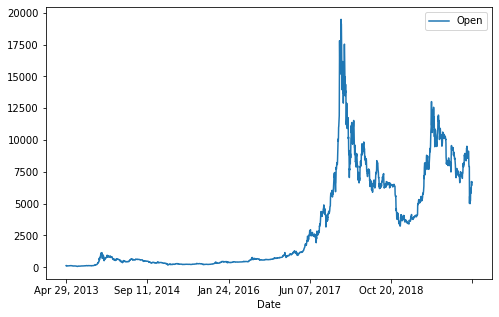

In [1]:
import pandas as pd

bitcoin = pd.read_csv('bitcoin_day.csv')
bitcoin.plot(x='Date', y='Open', figsize=(8,5))
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

<AxesSubplot:xlabel='Date'>

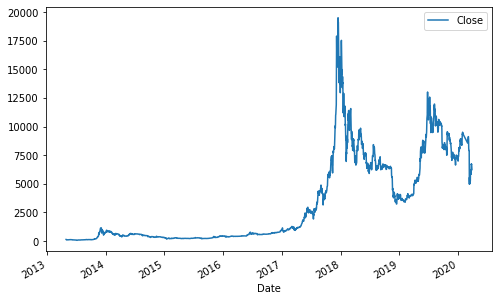

In [2]:
bitcoin.plot(x='Date', y='Close', figsize=(8,5))

In [3]:
import numpy as np
train = np.asarray(bitcoin[bitcoin['Date'] < '2017-10-01']['Close'])
test = np.asarray(bitcoin[bitcoin['Date'] >= '2017-10-01']['Close'])

In [4]:
window=20
X_train = np.asarray([train[i:i+window] for i in range(len(train)-window - 1)])[:,:,np.newaxis]
Y_train = np.asarray([train[i:i+window] for i in range(1, len(train)-window)])[:,:,np.newaxis]
X_test = np.asarray([test[i:i+window] for i in range(len(test)-window-1)])[:,:,np.newaxis]
Y_test = np.asarray([test[i:i+window] for i in range(len(test)-window)])[:,:,np.newaxis]

In [286]:
from importlib import reload
import vrnngan2
vrnngan2 = reload(vrnngan2)

In [289]:
from vrnngan2 import VRNNGRUGAN
from tensorflow import keras
import tensorflow as tf

tf.keras.backend.clear_session()

timesteps = X_train.shape[1]
feature_space = X_train.shape[2]
latent_dim = 16
z_dim = 16
model = VRNNGRUGAN(feature_space, z_dim, latent_dim, timesteps, 0.4)
model.compile(keras.optimizers.Adam(lr=0.0001), keras.optimizers.Adam(lr=0.03))
model.fit(X_train, X_train, batch_size= 16, epochs=100)

Epoch 1/100
100/100 [==============================] - 41s 34ms/step - total_loss: 22874422.0000 - loss: 22073244.6733 - kl: 9.3720 - discrim_loss: -57.0978 - discrim_loss_fake: 14.9725 - discrim_loss_real: -14.9725 - misled_loss: 28.5489
Epoch 2/100
100/100 [==============================] - 3s 33ms/step - total_loss: 22352720.0000 - loss: 20340294.5050 - kl: 33.2706 - discrim_loss: -172.4672 - discrim_loss_fake: 71.4920 - discrim_loss_real: -71.4920 - misled_loss: 86.2336
Epoch 3/100
100/100 [==============================] - 3s 33ms/step - total_loss: 20857022.0000 - loss: 21311237.8020 - kl: 164.0277 - discrim_loss: -283.3593 - discrim_loss_fake: 128.5266 - discrim_loss_real: -128.5266 - misled_loss: 141.6797
Epoch 4/100
100/100 [==============================] - 3s 33ms/step - total_loss: 16953990.0000 - loss: 16898639.4653 - kl: 775.6946 - discrim_loss: -389.4181 - discrim_loss_fake: 181.8130 - discrim_loss_real: -181.8130 - misled_loss: 194.7091
Epoch 5/100
100/100 [============

100/100 [==============================] - 3s 34ms/step - total_loss: 540.2875 - loss: 562.9175 - kl: 667.3786 - discrim_loss: -3463.8135 - discrim_loss_fake: 1719.4033 - discrim_loss_real: -1719.4033 - misled_loss: 1731.9067
Epoch 35/100
100/100 [==============================] - 3s 33ms/step - total_loss: 385.9563 - loss: 540.4975 - kl: 639.3563 - discrim_loss: -3565.8591 - discrim_loss_fake: 1770.4261 - discrim_loss_real: -1770.4261 - misled_loss: 1782.9296
Epoch 36/100
100/100 [==============================] - 3s 32ms/step - total_loss: 256.9596 - loss: 481.1967 - kl: 482.4732 - discrim_loss: -3667.9016 - discrim_loss_fake: 1821.4487 - discrim_loss_real: -1821.4487 - misled_loss: 1833.9508
Epoch 37/100
100/100 [==============================] - 3s 33ms/step - total_loss: 133.0180 - loss: 441.1033 - kl: 394.0197 - discrim_loss: -3769.9341 - discrim_loss_fake: 1872.4651 - discrim_loss_real: -1872.4651 - misled_loss: 1884.9670
Epoch 38/100
100/100 [==============================] - 3

100/100 [==============================] - 3s 32ms/step - total_loss: -1116.9407 - loss: 183.7027 - kl: 96.2967 - discrim_loss: -6931.9849 - discrim_loss_fake: 3453.4952 - discrim_loss_real: -3453.4952 - misled_loss: 3465.9924
Epoch 69/100
100/100 [==============================] - 3s 32ms/step - total_loss: -1140.4272 - loss: 185.2797 - kl: 96.4410 - discrim_loss: -7033.9800 - discrim_loss_fake: 3504.4932 - discrim_loss_real: -3504.4932 - misled_loss: 3516.9900
Epoch 70/100
100/100 [==============================] - 3s 33ms/step - total_loss: -1166.3478 - loss: 175.7580 - kl: 85.2214 - discrim_loss: -7135.9761 - discrim_loss_fake: 3555.4911 - discrim_loss_real: -3555.4911 - misled_loss: 3567.9880
Epoch 71/100
100/100 [==============================] - 3s 32ms/step - total_loss: -1196.3801 - loss: 171.7387 - kl: 82.4795 - discrim_loss: -7237.1860 - discrim_loss_fake: 3606.2730 - discrim_loss_real: -3606.2730 - misled_loss: 3618.5930
Epoch 72/100
100/100 [==============================]

In [448]:
model.compile(keras.optimizers.Adam(lr=0.0001), keras.optimizers.Adam(lr=0.03))
model.fit(X_train, X_train, batch_size= 16, epochs=50)

/mnt/c/Users/jchle/Work/Thesis/VAECJ/bash_venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
100/100 [==============================] - 43s 32ms/step - total_loss: -6887.4336 - loss: 340.0429 - kl: 7.0627 - discrim_loss: -35815.4922 - discrim_loss_fake: 17895.2354 - discrim_loss_real: -17895.2354 - misled_loss: 17907.7461
Epoch 2/50
100/100 [==============================] - 3s 31ms/step - total_loss: -6849.0732 - loss: 405.0338 - kl: 7.1317 - discrim_loss: -35917.5820 - discrim_loss_fake: 17946.2838 - discrim_loss_real: -17946.2838 - misled_loss: 17958.7910
Epoch 3/50
100/100 [==============================] - 3s 31ms/step - total_loss: -6876.0688 - loss: 304.1635 - kl: 6.6222 - discrim_loss: -36019.6875 - discrim_loss_fake: 17997.3334 - discrim_loss_real: -17997.3334 - misled_loss: 18009.8438
Epoch 4/50
100/100 [==============================] - 3s 31ms/step - total_loss: -6883.6851 - loss: 383.0486 - kl: 5.6988 - discrim_loss: -36121.7852 - discrim_loss_fake: 18048.3834 - discrim_loss_real: -18048.3834 - misled_loss: 18060.8926
Epoch 5/50
100/100 [===============

100/100 [==============================] - 3s 31ms/step - total_loss: -7530.3579 - loss: 304.1490 - kl: 5.6362 - discrim_loss: -39184.7734 - discrim_loss_fake: 19579.8781 - discrim_loss_real: -19579.8781 - misled_loss: 19592.3867
Epoch 35/50
100/100 [==============================] - 3s 31ms/step - total_loss: -7590.0845 - loss: 300.7628 - kl: 5.8427 - discrim_loss: -39286.8711 - discrim_loss_fake: 19630.9263 - discrim_loss_real: -19630.9263 - misled_loss: 19643.4355
Epoch 36/50
100/100 [==============================] - 3s 31ms/step - total_loss: -7614.1113 - loss: 324.3421 - kl: 6.8693 - discrim_loss: -39388.9766 - discrim_loss_fake: 19681.9784 - discrim_loss_real: -19681.9784 - misled_loss: 19694.4883
Epoch 37/50
100/100 [==============================] - 3s 31ms/step - total_loss: -7551.7339 - loss: 368.7633 - kl: 5.3119 - discrim_loss: -39491.0742 - discrim_loss_fake: 19733.0272 - discrim_loss_real: -19733.0272 - misled_loss: 19745.5371
Epoch 38/50
100/100 [=======================

In [453]:
model.save_weights('vrnnganv2_bitcoin_maybe_complete_outputs/vrnnganv2_bitcoin_maybe_complete_outputs')

In [271]:
from importlib import reload
import vrnngan2
vrnngan2 = reload(vrnngan2)

In [272]:
from vrnngan2 import VRNNGRUGAN
from tensorflow import keras
import os
timesteps = X_train.shape[1]
feature_space = X_train.shape[2]
latent_dim = 16
z_dim = 16
model = VRNNGRUGAN(feature_space, z_dim, latent_dim, timesteps, 0.4)
model.load_weights('vrnnganv2_bitcoin_maybe_complete/vrnnganv2_bitcoin_maybe_complete')

In [490]:
history = test[50:55]
history = np.reshape(history, (history.shape[0], 1))

In [491]:
results = model.rec_gen(history, 100)

tf.Tensor([[2107.3733]], shape=(1, 1), dtype=float32)
tf.Tensor([[1354.0562]], shape=(1, 1), dtype=float32)
tf.Tensor([[1360.3295]], shape=(1, 1), dtype=float32)
tf.Tensor([[1339.6426]], shape=(1, 1), dtype=float32)
tf.Tensor([[1326.5826]], shape=(1, 1), dtype=float32)
tf.Tensor([[1325.4792]], shape=(1, 1), dtype=float32)
tf.Tensor([[1368.6328]], shape=(1, 1), dtype=float32)
tf.Tensor([[1293.345]], shape=(1, 1), dtype=float32)
tf.Tensor([[1350.8843]], shape=(1, 1), dtype=float32)
tf.Tensor([[1368.8627]], shape=(1, 1), dtype=float32)
tf.Tensor([[1356.6964]], shape=(1, 1), dtype=float32)
tf.Tensor([[1337.6228]], shape=(1, 1), dtype=float32)
tf.Tensor([[1327.5775]], shape=(1, 1), dtype=float32)
tf.Tensor([[1353.7323]], shape=(1, 1), dtype=float32)
tf.Tensor([[1335.5051]], shape=(1, 1), dtype=float32)
tf.Tensor([[1354.1945]], shape=(1, 1), dtype=float32)
tf.Tensor([[1355.0059]], shape=(1, 1), dtype=float32)
tf.Tensor([[1355.6287]], shape=(1, 1), dtype=float32)
tf.Tensor([[1342.959]], shape

(0.0, 10000.0)

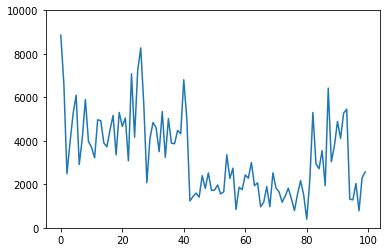

In [492]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.squeeze(results))
plt.ylim([0,10000])

In [110]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar, states = model.predict(X_train[0:300])

In [113]:
states[0][-1]

array([-1.        ,  0.9153513 , -0.9996898 ,  0.8105192 ,  1.        ,
        1.        , -1.        , -0.9999572 , -0.94376165,  0.91234887,
       -1.        , -0.9999363 ,  0.58654284,  1.        , -0.91687936,
        0.99999934], dtype=float32)

In [118]:
states[299][-1]

array([-1.        , -0.61710227, -1.        ,  0.99999946,  1.        ,
        1.        , -1.        , -1.        , -0.9688989 ,  1.        ,
       -0.00423388, -1.        ,  0.        ,  1.        , -0.46506518,
        1.        ], dtype=float32)

(0.0, 3000.0)

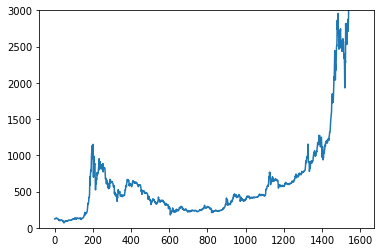

In [104]:
import matplotlib.pyplot as plt
plt.plot(X_train[:,-1,:])
plt.ylim([0,3000])

In [71]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [454]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar, output_mean, output_logvar,_ = model.predict(X_test)

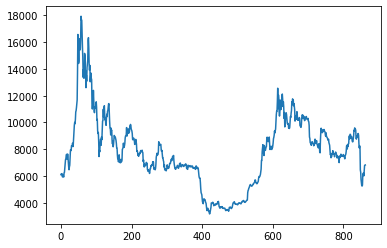

In [455]:
import matplotlib.pyplot as plt
plt.plot(output_mean[:,-1,:], label='predicted')
# plt.plot(Y_test[:-1,-1,:], label='truth')
# plt.legend()
# plt.show()


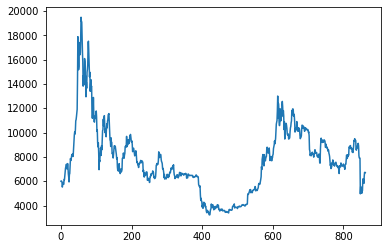

In [305]:
plt.plot(X_test[:,-1,:])

In [294]:
def np_kl_gauss(posterior_means, prior_means, posterior_log_var, prior_log_var):
    kl = prior_log_var - posterior_log_var + (np.exp(posterior_log_var) + 
                                       np.square(posterior_means - prior_means)) / np.exp(prior_log_var) - 1
    kl = 0.5 * np.sum(kl)
    return kl

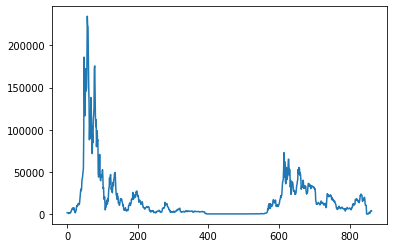

In [295]:
kl_values = []

for i in range(outputs.shape[0]):
    kl_vals = []
    for j in range(outputs.shape[1]):
        kl_vals.append(np_kl_gauss(q_mu[i][j], p_mu[i][j], q_logvar[i][j], p_logvar[i][j]))
    kl_values.append(kl_vals)

kl_sums = [np.sum(kl) for kl in kl_values]
kl_firsts = [kl[-1] for kl in kl_values]
plt.plot(kl_firsts)

In [43]:
kl_values

[[14891.05078125,
  3373.982421875,
  1521.222900390625,
  1179.486328125,
  1435.3656005859375,
  1803.661376953125,
  1428.6578369140625,
  1587.451904296875,
  1620.341552734375,
  1942.4560546875,
  1967.49267578125,
  1222.847900390625,
  1349.9638671875,
  913.30908203125,
  837.7374267578125,
  935.8107299804688,
  1212.967041015625,
  992.4140625,
  1074.2470703125,
  1360.142578125],
 [15905.8671875,
  3114.40576171875,
  1433.11376953125,
  1548.07470703125,
  1873.27490234375,
  1453.8248291015625,
  1596.297119140625,
  1626.234619140625,
  1945.8936767578125,
  1969.08935546875,
  1223.4190673828125,
  1350.2581787109375,
  913.4884033203125,
  837.8323974609375,
  935.8316650390625,
  1212.943603515625,
  992.3722534179688,
  1074.1754150390625,
  1360.0400390625,
  1285.9219970703125],
 [16250.416015625,
  3064.0908203125,
  1963.2344970703125,
  2045.79931640625,
  1522.248046875,
  1637.2744140625,
  1650.490478515625,
  1961.512451171875,
  1977.8055419921875,
  1226.

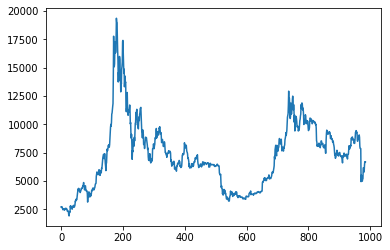

In [45]:
samples = model.generate(X_test)
plt.plot(samples[0][:,-1,:])

In [97]:
X_test[0].shape

(20, 1)

In [11]:
import matplotlib.pyplot as plt
outputs = lstm_model.predict(X_test)
plt.plot(outputs[:,-1,:])
plt.ylim([0,2000])

NameError: name 'lstm_model' is not defined

# VRNN Benchmark

In [240]:
from vrnngan import VRNNGRU
timesteps = X_train.shape[1]
latent_dim = 128
feature_space = X_train.shape[2]
rvae = VRNNGRU(feature_space, latent_dim, timesteps)
rvae.compile(optimizer=keras.optimizers.Adam(lr=0.001))
rvae.fit(X_train, Y_train, batch_size=8, epochs=100)

/mnt/c/Users/jchle/Work/Thesis/VAECJ/bash_venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
185/185 [==============================] - 5s 16ms/step - total_loss: 10826515.0000 - loss: 18735869.6667 - kl: 4158043.7121
Epoch 2/100
185/185 [==============================] - 3s 16ms/step - total_loss: 203996.4375 - loss: 269272.3032 - kl: 17572.4173
Epoch 3/100
185/185 [==============================] - 3s 16ms/step - total_loss: 37280.7344 - loss: 19493.2887 - kl: 20496.8164
Epoch 4/100
185/185 [==============================] - 3s 16ms/step - total_loss: 34038.6719 - loss: 15472.6445 - kl: 20527.9434
Epoch 5/100
185/185 [==============================] - 3s 16ms/step - total_loss: 33186.0664 - loss: 14160.2806 - kl: 18355.6740
Epoch 6/100
185/185 [==============================] - 3s 16ms/step - total_loss: 32413.2402 - loss: 15073.9120 - kl: 18457.6981
Epoch 7/100
185/185 [==============================] - 3s 16ms/step - total_loss: 31776.0293 - loss: 13768.0226 - kl: 16761.7706
Epoch 8/100
185/185 [==============================] - 3s 16ms/step - total_loss: 30542

In [237]:
outputs, z, q_mu, p_mu, q_logvar, p_logvar = rvae.predict(X_test)

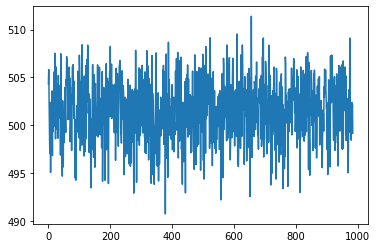

In [239]:
plt.plot(outputs[:,-1,:])

In [149]:
X_test[0]

array([[2407.88],
       [2488.55],
       [2515.35],
       [2511.81],
       [2686.81],
       [2863.2 ],
       [2732.16],
       [2805.62],
       [2823.81],
       [2947.71],
       [2958.11],
       [2659.63],
       [2717.02],
       [2506.37],
       [2464.58],
       [2518.56],
       [2655.88],
       [2548.29],
       [2589.6 ],
       [2721.79]])

In [168]:
outputs = model.predict(X_test[0:1])

In [170]:
outputs[0][:, -1, :]

array([[1505.7682]], dtype=float32)

In [176]:
np.concatenate((X_test[0:1][:,1:,:], [outputs[0][:, -1, :]]), axis=1)

array([[[2488.55      ],
        [2515.35      ],
        [2511.81      ],
        [2686.81      ],
        [2863.2       ],
        [2732.16      ],
        [2805.62      ],
        [2823.81      ],
        [2947.71      ],
        [2958.11      ],
        [2659.63      ],
        [2717.02      ],
        [2506.37      ],
        [2464.58      ],
        [2518.56      ],
        [2655.88      ],
        [2548.29      ],
        [2589.6       ],
        [2721.79      ],
        [1505.76818848]]])

In [180]:
seed = X_test[0:1]
steps = 100
results = []
for i in range(steps):
    outputs = model.predict(seed)
    results.append(outputs[0][:,-1,:])
    new_val = outputs[0][:, -1, :]
    seed = np.concatenate((seed[:,1:,:], [outputs[0][:, -1, :]]), axis=1)
print(results)

[array([[1208.7649]], dtype=float32), array([[1461.3828]], dtype=float32), array([[1183.6589]], dtype=float32), array([[1637.904]], dtype=float32), array([[1010.3834]], dtype=float32), array([[1669.7085]], dtype=float32), array([[812.45624]], dtype=float32), array([[1576.3412]], dtype=float32), array([[645.8373]], dtype=float32), array([[941.43335]], dtype=float32), array([[659.2259]], dtype=float32), array([[1255.1843]], dtype=float32), array([[558.6934]], dtype=float32), array([[1460.0181]], dtype=float32), array([[26.139763]], dtype=float32), array([[1373.9546]], dtype=float32), array([[1.7453572]], dtype=float32), array([[691.4321]], dtype=float32), array([[0.9895777]], dtype=float32), array([[1084.5522]], dtype=float32), array([[1.4663968]], dtype=float32), array([[826.5983]], dtype=float32), array([[2.2505774]], dtype=float32), array([[1009.2808]], dtype=float32), array([[1.584881]], dtype=float32), array([[818.2268]], dtype=float32), array([[1.6600654]], dtype=float32), array([[

# LSTM Benchmark

In [189]:
timesteps = X_train.shape[1]
latent_dim = 128
feature_space = X_train.shape[2]

lstm_input = keras.layers.Input(shape=(timesteps, feature_space))
lstm = keras.layers.LSTM(latent_dim, return_sequences=True)(lstm_input)
lstm = keras.layers.LSTM(64, return_sequences=True)(lstm)
output = keras.layers.TimeDistributed(keras.layers.Dense(feature_space))(lstm)

lstm_model = keras.Model(lstm_input, output)
lstm_model.compile(keras.optimizers.Adam(lr=0.001), loss='mean_squared_error')
lstm_model.fit(X_train, Y_train, batch_size= 64, epochs=300)

Epoch 1/300
24/24 [==============================] - 2s 20ms/step - loss: 338966.5625
Epoch 2/300
24/24 [==============================] - 0s 19ms/step - loss: 333860.4688
Epoch 3/300
24/24 [==============================] - 0s 19ms/step - loss: 330913.1250
Epoch 4/300
24/24 [==============================] - 0s 20ms/step - loss: 329068.5312
Epoch 5/300
24/24 [==============================] - 0s 19ms/step - loss: 327366.1562
Epoch 6/300
24/24 [==============================] - 0s 18ms/step - loss: 325706.3125
Epoch 7/300
24/24 [==============================] - 0s 19ms/step - loss: 324094.8125
Epoch 8/300
24/24 [==============================] - 0s 18ms/step - loss: 322536.6562
Epoch 9/300
24/24 [==============================] - 0s 19ms/step - loss: 321000.7188
Epoch 10/300
24/24 [==============================] - 0s 18ms/step - loss: 319525.9062
Epoch 11/300
24/24 [==============================] - 0s 19ms/step - loss: 318011.9062
Epoch 12/300
24/24 [==============================] 

24/24 [==============================] - 0s 19ms/step - loss: 147313.2656
Epoch 189/300
24/24 [==============================] - 0s 19ms/step - loss: 146659.2656
Epoch 190/300
24/24 [==============================] - 0s 18ms/step - loss: 146007.0469
Epoch 191/300
24/24 [==============================] - 0s 18ms/step - loss: 145403.0938
Epoch 192/300
24/24 [==============================] - 0s 19ms/step - loss: 144785.9844
Epoch 193/300
24/24 [==============================] - 0s 20ms/step - loss: 144226.6875
Epoch 194/300
24/24 [==============================] - 0s 19ms/step - loss: 143548.7031
Epoch 195/300
24/24 [==============================] - 0s 19ms/step - loss: 142904.3281
Epoch 196/300
24/24 [==============================] - 0s 18ms/step - loss: 142270.5312
Epoch 197/300
24/24 [==============================] - 0s 19ms/step - loss: 141660.1406
Epoch 198/300
24/24 [==============================] - 0s 18ms/step - loss: 141065.2812
Epoch 199/300
24/24 [=========================

In [190]:
lstm_model.fit(X_train, Y_train, batch_size= 64, epochs=300)

Epoch 1/300
24/24 [==============================] - 0s 19ms/step - loss: 90488.5859
Epoch 2/300
24/24 [==============================] - 0s 19ms/step - loss: 90111.1094
Epoch 3/300
24/24 [==============================] - 0s 18ms/step - loss: 89739.6406
Epoch 4/300
24/24 [==============================] - 0s 18ms/step - loss: 89372.9062
Epoch 5/300
24/24 [==============================] - 0s 18ms/step - loss: 88988.5859
Epoch 6/300
24/24 [==============================] - 0s 18ms/step - loss: 88628.1016
Epoch 7/300
24/24 [==============================] - 0s 18ms/step - loss: 88255.9609
Epoch 8/300
24/24 [==============================] - 0s 18ms/step - loss: 87880.4688
Epoch 9/300
24/24 [==============================] - 0s 19ms/step - loss: 87511.8594
Epoch 10/300
24/24 [==============================] - 0s 18ms/step - loss: 87158.7344
Epoch 11/300
24/24 [==============================] - 0s 18ms/step - loss: 86810.5391
Epoch 12/300
24/24 [==============================] - 0s 19ms/s

24/24 [==============================] - 0s 18ms/step - loss: 41501.0859
Epoch 191/300
24/24 [==============================] - 0s 18ms/step - loss: 41349.7695
Epoch 192/300
24/24 [==============================] - 0s 19ms/step - loss: 41357.1602
Epoch 193/300
24/24 [==============================] - 0s 18ms/step - loss: 41042.0664
Epoch 194/300
24/24 [==============================] - 0s 19ms/step - loss: 40858.8164
Epoch 195/300
24/24 [==============================] - 0s 18ms/step - loss: 40695.7656
Epoch 196/300
24/24 [==============================] - 0s 19ms/step - loss: 40553.5039
Epoch 197/300
24/24 [==============================] - 0s 19ms/step - loss: 40411.5664
Epoch 198/300
24/24 [==============================] - 0s 19ms/step - loss: 40218.8672
Epoch 199/300
24/24 [==============================] - 0s 18ms/step - loss: 40065.5469
Epoch 200/300
24/24 [==============================] - 0s 19ms/step - loss: 39913.3594
Epoch 201/300
24/24 [==============================] - 0s

In [186]:
seed = X_test[0:1]
steps = 100
results = []
for i in range(steps):
    outputs = lstm_model.predict(seed)
    results.append(outputs[:,-1,:])
    new_val = outputs[:, -1, :]
    seed = np.concatenate((seed[:,1:,:], [outputs[:, -1, :]]), axis=1)
print(results)

[array([[1143.3176]], dtype=float32), array([[1123.702]], dtype=float32), array([[1118.9131]], dtype=float32), array([[1117.6069]], dtype=float32), array([[1117.0526]], dtype=float32), array([[1116.7053]], dtype=float32), array([[1116.4736]], dtype=float32), array([[1116.343]], dtype=float32), array([[1116.2788]], dtype=float32), array([[1116.2491]], dtype=float32), array([[1116.2349]], dtype=float32), array([[1116.2058]], dtype=float32), array([[1115.7034]], dtype=float32), array([[1111.6565]], dtype=float32), array([[1107.3336]], dtype=float32), array([[1104.4708]], dtype=float32), array([[1102.5657]], dtype=float32), array([[1101.2875]], dtype=float32), array([[1100.3188]], dtype=float32), array([[1099.614]], dtype=float32), array([[1099.1569]], dtype=float32), array([[1098.862]], dtype=float32), array([[1098.6722]], dtype=float32), array([[1098.5515]], dtype=float32), array([[1098.4746]], dtype=float32), array([[1098.4258]], dtype=float32), array([[1098.395]], dtype=float32), array